In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display

In [13]:
"""
path="/home/mike/TFM/programacion/datasets/RAVDESS/buena_remesa/final/03-01-03-02-02-01-04.wav"
sr=44100
x, _ = librosa.core.load(path, sr=sr, mono=True)
"""

'\npath="/home/mike/TFM/programacion/datasets/RAVDESS/buena_remesa/final/03-01-03-02-02-01-04.wav"\nsr=44100\nx, _ = librosa.core.load(path, sr=sr, mono=True)\n'

In [50]:
path="/home/mike/TFM/programacion/datasets/berlin/all-mono-wav-audios/08b02Tc.wav"
sr=16000
x, _ = librosa.core.load(path, sr=sr, mono=True)

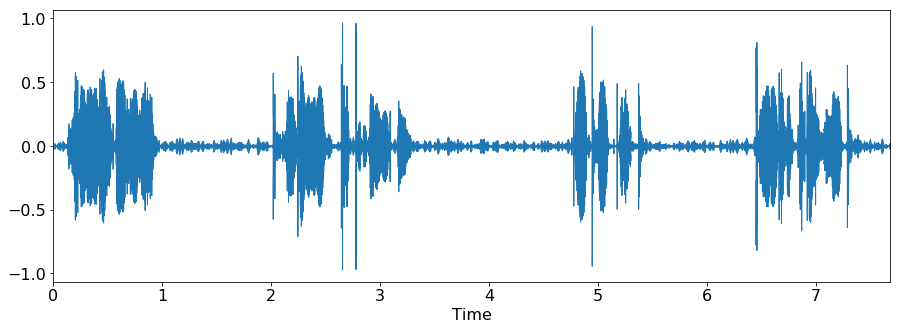

In [51]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = (15.0, 5.0)
librosa.display.waveplot(x, sr=sr)

In [52]:
IPython.display.Audio(x, rate=sr)

In [53]:
from sklearn import preprocessing


#,hop_length=hop_length
mfcc = librosa.feature.mfcc(x,n_mfcc=128)
mfcc_delta = librosa.feature.delta(mfcc)
mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

mfcc = mfcc.transpose()
mfcc_delta = mfcc_delta.transpose()
mfcc_delta2 = mfcc_delta2.transpose()
        
mfcc = preprocessing.MinMaxScaler().fit_transform(mfcc)
mfcc_delta = preprocessing.MinMaxScaler().fit_transform(mfcc_delta)
mfcc_delta2 = preprocessing.MinMaxScaler().fit_transform(mfcc_delta2)

mfcc = mfcc.transpose()
mfcc_delta = mfcc_delta.transpose()
mfcc_delta2 = mfcc_delta2.transpose()
        
        
print(x.shape)
print(sr)
print(mfcc.shape)
print(mfcc_delta.shape)
print(mfcc_delta2.shape)

(122871,)
16000
(128, 240)
(128, 240)
(128, 240)


In [54]:
from keras.preprocessing import sequence
max_len = 256
mfcc_original=mfcc
mfcc = sequence.pad_sequences(mfcc,
                              maxlen=max_len,
                              dtype='float32',
                              padding='post',
                              value=0.0)

mfcc_delta = sequence.pad_sequences(mfcc_delta,
                              maxlen=max_len,
                              dtype='float32',
                              padding='post',
                              value=0.0)

mfcc_delta2 = sequence.pad_sequences(mfcc_delta2,
                              maxlen=max_len,
                              dtype='float32',
                              padding='post',
                              value=0.0)

mfcc = mfcc.transpose()
mfcc_delta = mfcc_delta.transpose()
mfcc_delta2 = mfcc_delta2.transpose()
print(mfcc.shape)
print(mfcc_delta.shape)
print(mfcc_delta2.shape)

(256, 128)
(256, 128)
(256, 128)


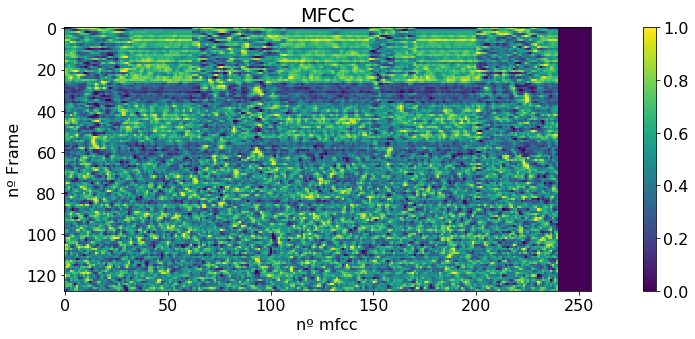

In [55]:
plt.imshow(mfcc.transpose())
plt.title('MFCC')
plt.xlabel('nº mfcc')
plt.ylabel('nº Frame')
plt.colorbar()
plt.tight_layout()

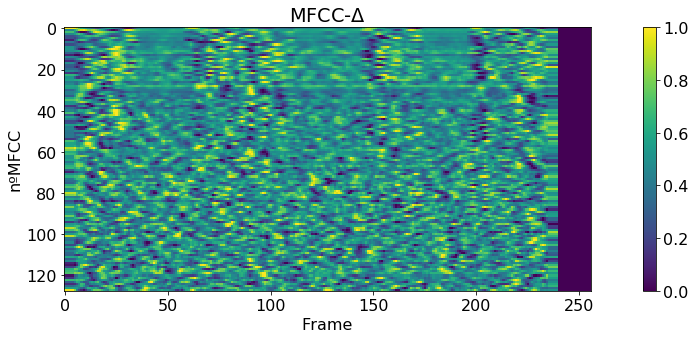

In [56]:
plt.imshow(mfcc_delta.transpose())
plt.title(r'MFCC-$\Delta$')
plt.xlabel('Frame')
plt.ylabel('nºMFCC')
plt.colorbar()
plt.tight_layout()

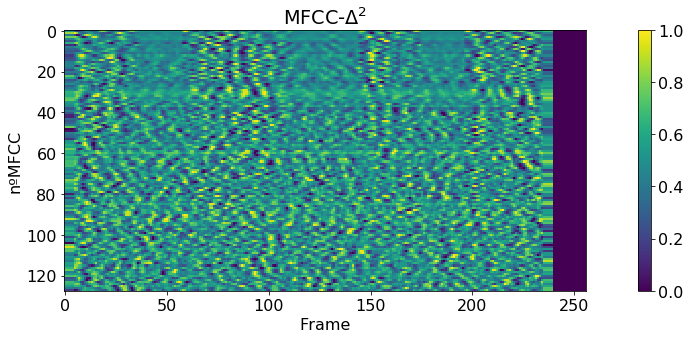

In [57]:
plt.imshow(mfcc_delta2.transpose())
plt.title(r'MFCC-$\Delta^2$')
plt.xlabel('Frame')
plt.ylabel('nºMFCC')
plt.colorbar()
plt.tight_layout()

In [58]:
librosa.output.write_wav('prueba.wav', x, sr)

AttributeError: module 'librosa.feature' has no attribute 'inverse'